Ce code permet d'analyser directement les différents résultats des analyses modales faites dans les notebooks "anaylse_ulysse,vico,armand...ipynb". 
Il compare les rapports égalements à ceux d'une plaque analytiquement simplement appuyé ou encastrée.

Dans un second temps, il convertit les amortissements obtenues par ESPRIT lors des analyses modales en amortissement modaux et réexportes les pickles.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

%matplotlib widget

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

In [25]:
import sys
sys.path.append("../")
from vico_modphy.guitare_config import *

In [26]:
fnB/fnB[0]

array([ 1.        ,  1.90746888,  3.09253112,  3.41991701,  4.        ,
        5.51244813,  5.5373444 ,  6.58008299,  7.48755187,  7.62987552,
        9.        , 11.11742739, 11.4626556 , 12.37012448, 13.88257261,
       16.        ])

In [27]:
with open('modal_plexi.pkl', 'rb') as f:
    modal_analysis_plexi = pickle.load(f)

with open('modal_m2.pkl', 'rb') as f:
    modal_analysis_m2 = pickle.load(f)
    
with open('modal_metal.pkl', 'rb') as f:
    modal_analysis_metal = pickle.load(f)

with open('modal_m1.pkl', 'rb') as f:
    modal_analysis_m1 = pickle.load(f)

with open('modal_comp.pkl', 'rb') as f:
    modal_comp = pickle.load(f)

In [28]:
pd.DataFrame(modal_comp).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
freq_metal,173.000000,345.000000,378.000000,506.000000,606.000000,711.000000,776.000000,842.000000,889.000000,967.000000,1049.000000,1097.000000,1184.000000
freq_plexi,72.097413,142.142158,156.590101,236.726950,248.253002,294.943587,337.500398,402.021668,444.456305,480.000000,496.899323,545.177100,561.253466
freq_medium_1,75.000000,149.000000,160.000000,182.000000,270.000000,286.000000,319.000000,345.000000,427.000000,460.000000,522.000000,602.000000,654.000000
freq_medium_2,106.977170,164.907398,189.347473,265.935193,413.260579,425.578392,460.048020,533.506681,604.373833,694.372806,759.739288,817.618827,870.982847
ratios_metal,1.000000,1.994220,2.184971,2.924855,3.502890,4.109827,4.485549,4.867052,5.138728,5.589595,6.063584,6.341040,6.843931
ratios_plexi,1.000000,1.971529,2.171924,3.283432,3.443300,4.090904,4.681172,5.576090,6.164664,6.657659,6.892055,7.561674,7.784655
ratios_medium_1,1.000000,1.986667,2.133333,2.426667,3.600000,3.813333,4.253333,4.600000,5.693333,6.133333,6.960000,8.026667,8.720000
ratios_medium_2,1.000000,1.541520,1.769980,2.485906,3.863073,3.978217,4.300432,4.987108,5.649559,6.490850,7.101882,7.642928,8.141764


In [29]:
freq_metal = modal_comp["freq_metal"]
freq_plexi = modal_comp["freq_plexi"]
freq_m1 = modal_comp["freq_medium_1"]
freq_m2 = modal_comp["freq_medium_2"]

AS_ratios = []

ratios1_metal = []
ratios1_plexi = []
ratios1_m1 = []
ratios1_m2 = []
ratios2_metal = np.array(freq_metal)/freq_metal[0]
ratios2_plexi = np.array(freq_plexi)/freq_plexi[0]
ratios2_m1 = np.array(freq_m1)/freq_m1[0]
ratios2_m2 = np.array(freq_m2)/freq_m2[0]
for i in range(len(freq_metal)-1) :
    ratios1_metal.append(freq_metal[i+1]/freq_metal[i])
    ratios1_plexi.append(freq_plexi[i+1]/freq_plexi[i])
    ratios1_m1.append(freq_m1[i+1]/freq_m1[i])
    ratios1_m2.append(freq_m2[i+1]/freq_m2[i])
    AS_ratios.append(fnB[i+1]/fnB[i])

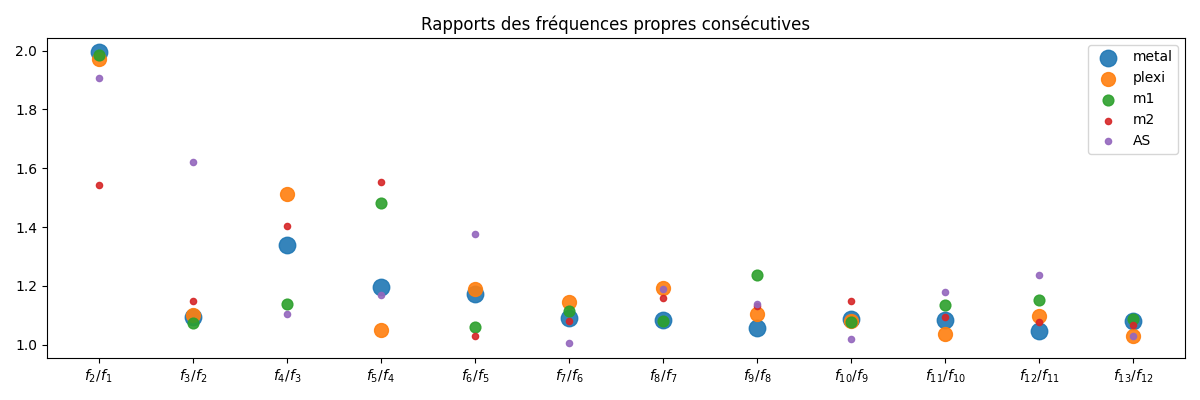

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

labels = [f"$f_{{{i+2}}}/f_{{{i+1}}}$" for i in range(len(ratios1_metal))]

ax1.scatter(np.arange(len(ratios1_metal)),ratios1_metal,label="metal", alpha=0.9, s=7*20)
ax1.scatter(np.arange(len(ratios1_plexi)),ratios1_plexi,label="plexi", alpha=0.9, s=5*20)
ax1.scatter(np.arange(len(ratios1_m1)),ratios1_m1,label="m1", alpha=0.9, s=3*20)
ax1.scatter(np.arange(len(ratios1_m2)),ratios1_m2,label="m2", alpha=0.9, s=1*20)
ax1.scatter(np.arange(len(AS_ratios)),np.array(AS_ratios),label="AS", alpha=0.9, s=1*20)
# ax1.grid()
ax1.legend()
ax1.set_xticks(np.arange(len(ratios1_m2)))
ax1.set_xticklabels(labels)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"Rapports des fréquences propres consécutives")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

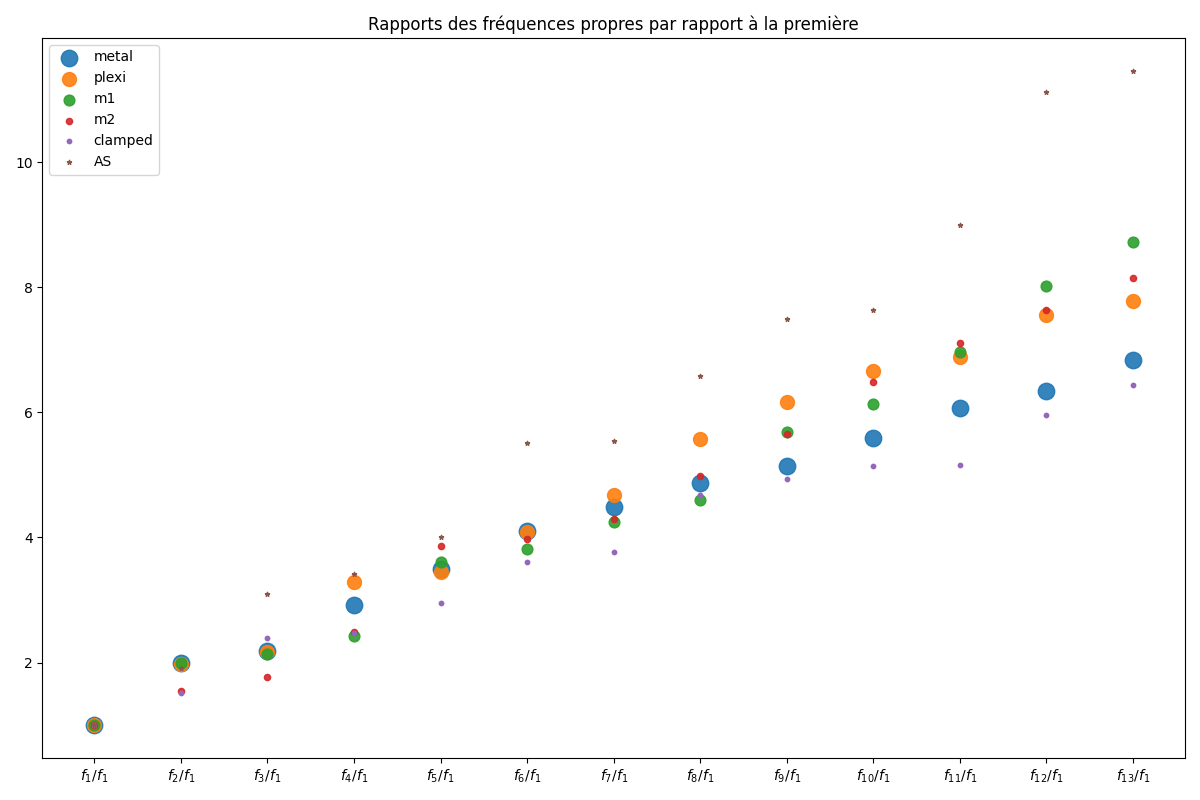

In [31]:
clamped_ratio = np.load("../vico_modphy/clamped_ratio.npy")

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

labels = [f"$f_{{{i+1}}}/f_{{{1}}}$" for i in range(len(ratios2_metal))]

ax1.scatter(np.arange(len(ratios2_metal)),ratios2_metal,label="metal", alpha=0.9, s=7*20)
ax1.scatter(np.arange(len(ratios2_plexi)),ratios2_plexi,label="plexi", alpha=0.9, s=5*20)
ax1.scatter(np.arange(len(ratios2_m1)),ratios2_m1,label="m1", alpha=0.9, s=3*20)
ax1.scatter(np.arange(len(ratios2_m2)),ratios2_m2,label="m2", alpha=0.9, s=1*20)
ax1.scatter(np.arange(len(ratios2_m2)), clamped_ratio[:len(ratios2_m2)], label="clamped", s=0.5*20)
ax1.scatter(np.arange(len(ratios2_m2)), (fnB/fnB[0])[:len(ratios2_m2)], label="AS", s=0.5*20, marker="*")
# ax1.grid()
ax1.legend()
ax1.set_xticks(np.arange(len(ratios2_m2)))
ax1.set_xticklabels(labels)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"Rapports des fréquences propres par rapport à la première")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

# Amortissements modaux

ESPRIT nous donne $\delta_n, f_n$ tel que $s(t) = \sum_n a_n e^{\delta_n + 2i\pi f_n}$. Or, $f_n$ est ainsi "normalisée" par la fréquence d'échantillonnage. En réalité, pour accéder à la fréquence en Hz il faut donc multiplier par la fréquence d'échantillonnage. Ainsi, pour obtenir les $\delta_n$ aussi !

De plus, quand on écrit une décomposition modale on a plutôt tendance à écrire $\delta_n = 2\xi_n\omega_n$. Ainsi, l'amortissement modal se déduit de la méthode ESPRIT par :
$$
\xi_n =\frac{\delta_n^{ESP} f_s}{2\omega_n}
$$

In [23]:
pd.DataFrame(modal_analysis_metal)

,0,1,2,3,4,5,6,7,8,9,10,11,12
table,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal
freq,173,345,378,506,606,711,776,842,889,967,1049,1097,1184
xi,-0.000429,-0.000814,-0.000775,-0.000819,-0.000982,-0.0006,-0.001486,-0.001408,-0.001427,-0.001286,-0.00196,-0.001712,-0.001862
ratios,1.0,1.99422,2.184971,2.924855,3.50289,4.109827,4.485549,4.867052,5.138728,5.589595,6.063584,6.34104,6.843931


In [33]:
modal_analysis_plexi["xi_mod"] = modal_analysis_plexi["xi"]*51200/2/modal_analysis_plexi["freq"]
modal_analysis_metal["xi_mod"] = modal_analysis_metal["xi"]*51200/2/modal_analysis_metal["freq"]
modal_analysis_m1["xi_mod"] = modal_analysis_m1["xi"]*51200/2/modal_analysis_m1["freq"]
modal_analysis_m2["xi_mod"] = modal_analysis_m2["xi"]*51200/2/modal_analysis_m2["freq"]

pd.DataFrame(modal_analysis_plexi).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
table,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi
freq,72.097413,142.142158,156.590101,236.72695,248.253002,294.943587,337.500398,402.021668,444.456305,480.0,496.899323,545.1771,561.253466,587.926653,652.493822,667.709243,691.521475
xi,-0.000201,-0.00021,-0.00045,-0.000356,-0.000392,-0.000153,-0.000507,-0.000319,-0.000362,-0.000275,-0.000584,-0.000823,-0.000755,-0.000377,-0.000542,-0.003401,-0.000542
ratios,1.0,1.971529,2.171924,3.283432,3.4433,4.090904,4.681172,5.57609,6.164664,6.657659,6.892055,7.561674,7.784655,8.154615,9.05017,9.261209,9.591488
xi_mod,-0.071505,-0.037908,-0.073574,-0.038456,-0.040453,-0.013247,-0.03843,-0.020312,-0.020856,-0.014682,-0.030071,-0.038635,-0.034432,-0.016427,-0.021269,-0.130382,-0.020069


In [34]:
#Reexportation

import pickle
with open('modal_metal.pkl', 'wb') as f:
    pickle.dump(modal_analysis_metal, f)

with open('modal_plexi.pkl', 'wb') as f:
    pickle.dump(modal_analysis_plexi, f)

with open('modal_m1.pkl', 'wb') as f:
    pickle.dump(modal_analysis_m1, f)

with open('modal_m2.pkl', 'wb') as f:
    pickle.dump(modal_analysis_m2, f)

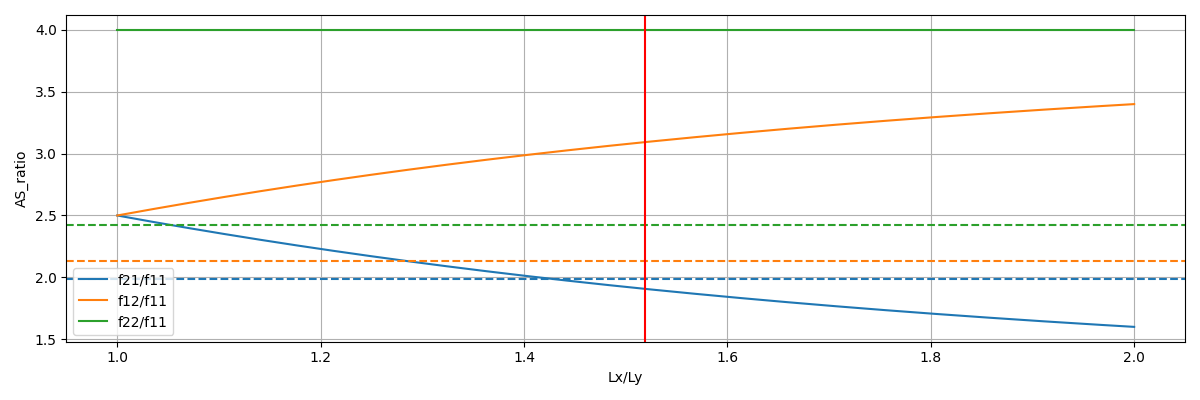

In [24]:
def AS_ratio(n,m,Lxy_ratio) :
    """
    Calcul le ratio fnm/f11 pour une plaque simplement appuyé
    """
    # num = (n*Ly)**2 + (m*Lx)**2
    # den = Ly**2 + Lx**2

    num  = n**2 + (Lxy_ratio*m)**2
    den = 1 + (Lxy_ratio)**2
    return num/den

Lxy_ratio = np.linspace(1,2,1000)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(Lxy_ratio,AS_ratio(2,1,Lxy_ratio),label="f21/f11")
ax1.plot(Lxy_ratio,AS_ratio(1,2,Lxy_ratio),label="f12/f11")
ax1.plot(Lxy_ratio,AS_ratio(2,2,Lxy_ratio),label="f22/f11")
ax1.grid()
ax1.legend()
ax1.set_xlabel("Lx/Ly")
ax1.set_ylabel("AS_ratio")
ax1.set_title(r"")
xlims = ax1.set_xlim()
ylims = ax1.set_ylim()
ax1.hlines(ratios2_m1[1], xlims[0], xlims[1], ls="--")
ax1.hlines(ratios2_m1[2], xlims[0], xlims[1], ls="--", color="tab:orange")
ax1.hlines(ratios2_m1[3], xlims[0], xlims[1], ls="--", color="tab:green")

ax1.vlines(Lx/Ly, ylims[0], ylims[1], ls="-", color="r")

fig.tight_layout()

plt.show()

In [19]:
print(ratios2_m1)

[1.         1.98666667 2.13333333 2.42666667 3.6        3.81333333
 4.25333333 4.6        5.69333333 6.13333333 6.96       8.02666667
 8.72      ]


In [13]:
NmB_idx[:,1]

array([2., 1.])